# Image Searching using Histogram
**Develop an algorithm that can search for an image in another image. For this, it is necessary to calculate a histogram for a fragment of the image. Then move a window in the target image and in each transition separate a piece of the image calculate its histogram. Compare the histogram of the image fragment with the searched fragment. Then select a fragment of the image which is most similar to the histogram of the searched fragment.**


The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output

In [272]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In the next lines, we will read the image in grayscale mode using `cv2.imread()` function.
Then it will be showed using `plt.imshow()` and `plt.imshow()` functions.

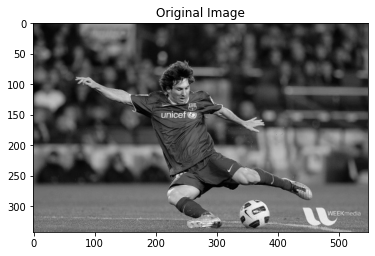

In [273]:
# Reading Airplane.tiff in grayscale mode
original_img = cv2.imread("../../images/messi5.jpg", cv2.IMREAD_GRAYSCALE)

# Passing the image with gray cmap for showing
plt.imshow(original_img, cmap="gray")

# Showing the image
plt.title("Original Image")
plt.show()

In [274]:
original_img.shape

(342, 548)

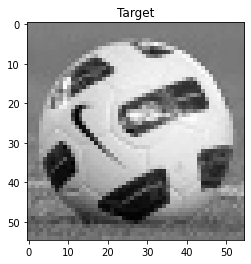

In [289]:
# Specify the coordinates of the target
y_start, x_start = 285, 335
height, width = 55, 55

# Slice image to crop the target
target = original_img[y_start : y_start + height, x_start : x_start + width]

# Showing the image
plt.imshow(target, cmap="gray")
plt.title("Target")
plt.show()

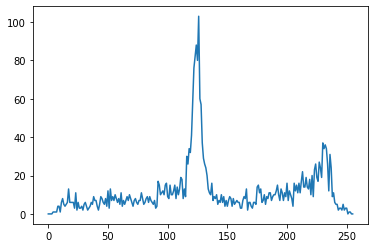

In [276]:
# Calculating target histogram in grayscale mode, no mask, and 256 gray levels and bins
target_histogram = cv2.calcHist([target], [0], None, [256], [0, 256])

# Showing histogram plot
plt.plot(target_histogram)
plt.show()

In [302]:
def find_target(target, original_img):
    """
    target: the fragement of the image in order to search
    original_img: the image it should search in
    return a np.array() which has the least difference with target
    """
    # Initializing sizes
    img_shape = original_img.shape
    height, width = target.shape
    # Variable for comparing diffrences
    current_min = float("inf")
    
    # Sliding a window over the image
    for i in range(0, img_shape[0] - height):
        for j in range(0, img_shape[1] - width):
            # Choosing a fragment of the image
            fragment = original_img[i : i + height, j : j + width]
            # Calculating histogram of the fragment
            fragment_hist = cv2.calcHist([fragment], [0], None, [256], [0, 256])
            # Calculating difference between target and chosen fragment
            diff = cv2.compareHist(target_histogram, fragment_hist, cv2.HISTCMP_CHISQR)
            # Checking for need to update the result
            if diff < current_min:
                result = fragment
                current_min = diff
    return result

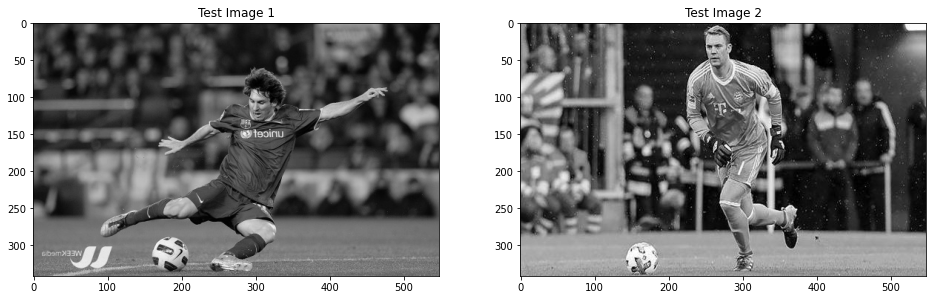

In [303]:
# Generating two images for test function
test_img_1 = cv2.flip(original_img, 1)
test_img_2 = cv2.imread("../../images/neuer.jpeg", cv2.IMREAD_GRAYSCALE)


# Showing the test images
f, subplt = plt.subplots(1, 2, figsize=(16, 14))
subplt[0].imshow(test_img_1, cmap="gray")
subplt[0].set_title("Test Image 1")

subplt[1].imshow(test_img_2, cmap="gray")
subplt[1].set_title("Test Image 2")

plt.show()

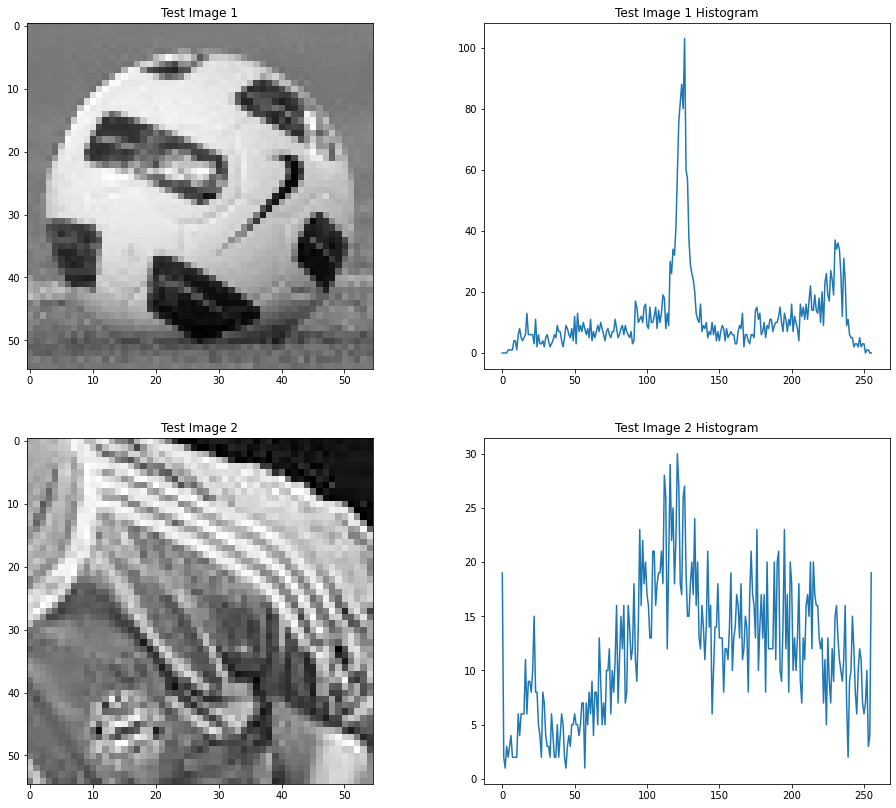

In [301]:
# Calling function for searching the target in test pictures
result_1 = find_target(target, test_img_1)
result_2 = find_target(target, test_img_2)

# Showing test images and their histograms
f, subplt = plt.subplots(2, 2, figsize=(16, 14))
subplt[0, 0].imshow(result_1, cmap="gray")
subplt[0, 0].set_title("Test Image 1")

subplt[0, 1].plot(cv2.calcHist([result_1], [0], None, [256], [0, 256]))
subplt[0, 1].set_title("Test Image 1 Histogram")

subplt[1, 0].imshow(result_2, cmap="gray")
subplt[1, 0].set_title("Test Image 2")

subplt[1, 1].plot(cv2.calcHist([result_2], [0], None, [256], [0, 256]))
subplt[1, 1].set_title("Test Image 2 Histogram")

plt.show()